<a href="https://colab.research.google.com/github/mikirosario/python_exercises/blob/master/mod03/ex00/SentimentAnalaysis_Avengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # !pip install colab-xterm
# # %load_ext colabxterm
%xterm

In [124]:
import time
import datetime
from math import ceil

def my_progress_bar(lst: list):
        start_time = datetime.datetime.now()
        ms_time_diff = 0
        total_elems = len(lst)
        remaining_elems = 0
        width = 20
        fill_width = 0
        fill_bar = str()
        for elem in lst:
                ms_time_diff = (datetime.datetime.now() - start_time).total_seconds() * 1000
                remaining_elems = total_elems - lst.index(elem)
                processed_elems = total_elems - remaining_elems
                percentage_remaining = 100 * remaining_elems / total_elems
                percentage_complete = 100 - percentage_remaining
                mean_delta_time = ms_time_diff / (1 if processed_elems == 0 else processed_elems)
                remaining_time = mean_delta_time * remaining_elems * 0.001
                fill_width = 0 if percentage_complete == 0 else width - (width * percentage_remaining * 0.01)
                fill_bar = str().ljust(int(fill_width), '=') + '>'
                progress_bar = str(f"\rETA: {datetime.timedelta(seconds=ceil(remaining_time))} [{percentage_complete:6.2f}%] [{str(fill_bar).ljust(width, ' ')}] {processed_elems}/{total_elems} | elapsed time: {datetime.timedelta(seconds=ceil(ms_time_diff * 0.001))}")
                progress_bar_len = len(progress_bar)
                print(progress_bar, end="")
                yield elem
                print(str('\r').ljust(progress_bar_len), end="")
        print(f"\rETA: 0:00:00 [100%] [{str(fill_bar).ljust(width, ' ')}] {total_elems}/{total_elems} | elapsed time: {datetime.timedelta(seconds=ceil(ms_time_diff * 0.001))}")

ETA: 0:00:01 [ 99.99%] [===================>] 14999/15000 | elapsed time: 0:39:29
POS:  51.61%
NEU:  46.23%
NEG:  2.16%


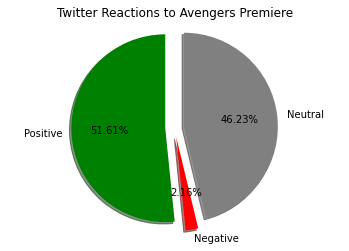

In [134]:
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet
import csv
import matplotlib.pyplot as plt

class Analysis:
  positive = 0
  neutral = 0
  negative = 0

def get_text(line: list):
  text = line[1]
  i = text.find(':')
  return text[i+2:]

def show_pie_chart(analysis: Analysis):
  labels= ['Positive', 'Negative', 'Neutral']
  colors=['green', 'red', 'gray']
  sizes= [analysis.positive, analysis.negative, analysis.neutral]
  plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
  plt.title('Twitter Reactions to Avengers Premiere')
  plt.axis('equal')
  plt.show()

analyzer = create_analyzer(task="sentiment", lang="en")
analysis = Analysis()

with open('/content/mod03_ex00/tweets.csv', mode='r', encoding='cp1252') as f:
  f.__next__()
  reader = csv.reader(f, datetime)
  for texts_total, line in enumerate(reader):
    pass
  texts_total += 1
  f.seek(0)
  f.__next__()
  reader = csv.reader(f, delimiter=',')
  textc = 0
  total = range(texts_total)
  # i = 0
  for line, elem in zip(reader, my_progress_bar(total)):
    text = preprocess_tweet(get_text(line))
    res = analyzer.predict(text).output
    # # Limit analyzed text strings to this number
    # if i == 10:
    #   break
    # i += 1
    if (res == 'POS'):
      analysis.positive += 1
    elif res == 'NEU':
      analysis.neutral += 1
    else:
      analysis.negative += 1
    textc += 1
  
  print("\nPOS: ", f"{100 * analysis.positive / textc:.2f}%")
  print("NEU: ", f"{100 * analysis.neutral / textc:.2f}%")
  print("NEG: ", f"{100 * analysis.negative / textc:.2f}%")
  show_pie_chart(analysis)